# MODELING - Regression 22/01

In [1]:

import numpy as np 
import pandas as pd 

import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn import metrics 
import xgboost as xgb




## Load Dataset

In [2]:
df = pd.read_csv('Data/DC_Prop_Residential_Regression.csv', index_col= 'Unnamed: 0')
df.shape

(45851, 130)

Mendapatkan HARGA yang tidak diketahui ke DataFrame yang berbeda untuk prediksi

## Menentukan Feature dan Target

In [3]:
X=df.drop(['PRICE'],axis=1)
y=df['PRICE']

## Regresi untuk setiap model

In [4]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    print('Model Performance')
    print('R2:', metrics.r2_score(y_test, predictions))
    print('Mean_Absolute_Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

### OLS Regression

In [5]:
#split into Test and Train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
model = sm.OLS(y_train, X_train.astype(float)).fit()
# Print out the statistics
#evaluate Accuracy
evaluate(model, X_test, y_test)
model.summary()



Model Performance
R2: 0.8324684857643745
Mean_Absolute_Error: 5.745566789889806
Mean_Squared_Error: 61.76810151177368
RMSE: 7.85926850996794


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     3303.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:49:47   Log-Likelihood:            -1.2807e+05
No. Observations:               36680   AIC:                         2.562e+05
Df Residuals:                   36626   BIC:                         2.567e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
BATHRM                     1.4055      0.071     19.807      0.000       1.266       1.545
HF_BATHRM                  1.1820      0.081     14.664      0.000       1.024       1.340
NUM_UNITS                 -1.4845      0.240     -6.191      0.000      -1.955      -1.014
ROOMS                      0.0469      0.033      1.422      0.155      -0.018       0.111
BEDRM                      0.0364      0.060      0.602      0.547      -0.082       0.155
AYB                        0.6649      0.004    157.046      0.000       0.657       0.673
YR_RMDL                   -0.0132      0.003     -5.162      0.000      -0.018      -0.008
EYB                        0.7364      0.006    132.648      0.000       0.725       0.747
STORIES                    0.2461      0.203      1.211      0.226      -0.152       0.644
SALE_NUM                  -0.0838      0.036     -2.299      0.021      -0.155      -0.012
GBA                        0.0043      0.000     34.152      0.000       0.004       0.005
BLDG_NUM               -2722.7777     20.001   -136.130      0.000   -2761.981   -2683.575
KITCHENS                   0.6509      0.206      3.157      0.002       0.247       1.055
FIREPLACES                 1.6550      0.068     24.391      0.000       1.522       1.788
USECODE                    0.1616      0.018      9.048      0.000       0.127       0.197
LANDAREA                   0.0005   3.47e-05     15.568      0.000       0.000       0.001
SalevYB                    0.7293      0.004    167.215      0.000       0.721       0.738
SalevYI                    0.6579      0.005    144.761      0.000       0.649       0.667
HEAT_Air-Oil            4.632e-11   3.52e-13    131.711      0.000    4.56e-11     4.7e-11
HEAT_Elec Base Brd      1.522e-11   1.19e-13    127.659      0.000     1.5e-11    1.55e-11
HEAT_Electric Rad       -3.11e-11   2.39e-13   -129.881      0.000   -3.16e-11   -3.06e-11
HEAT_Evp Cool          -2.441e-11   1.74e-13   -140.167      0.000   -2.47e-11   -2.41e-11
HEAT_Forced Air            3.2606      3.009      1.084      0.278      -2.637       9.158
HEAT_Gravity Furnac    -2.421e-12   1.69e-14   -143.549      0.000   -2.45e-12   -2.39e-12
HEAT_Hot Water Rad         3.6389      3.008      1.210      0.226      -2.257       9.535
HEAT_Ht Pump           -4.311e-11   3.11e-13   -138.773      0.000   -4.37e-11   -4.25e-11
HEAT_Ind Unit          -2.962e-11   2.29e-13   -129.561      0.000   -3.01e-11   -2.92e-11
HEAT_Wall Furnace      -3.887e-11   2.91e-13   -133.558      0.000   -3.94e-11   -3.83e-11
HEAT_Warm Cool             3.5719      3.010      1.187      0.235      -2.327       9.471
HEAT_Water Base Brd     1.392e-11   1.11e-13    125.288      0.000    1.37e-11    1.41e-11
AC_1                       1.5104      0.135     11.186      0.000       1.246  

### LinearRegression

In [6]:
reg = LinearRegression().fit(X_test, y_test)
reg.score(X_test, y_test)

0.8338295744236154

In [7]:
drop1 = ['ROOF_Slate', 'ROOMS', 'EXTWALL_Vinyl Siding', 'EXTWALL_Brick/Siding', 'STORIES', 'HEAT_Hot Water Rad', 'HEAT_Warm Cool', 'EXTWALL_Wood Siding', 'EXTWALL_Stucco', 'EXTWALL_Common Brick', 'HEAT_Forced Air', 'INTWALL_Wood Floor', 'STYLE_2.5 Story Fin', 'STRUCT_Multi', 'BEDRM', 'STRUCT_Row Inside', 'STRUCT_Row End', 'STRUCT_Single', 'STRUCT_Semi-Detached', 'STRUCT_Town End', 'STRUCT_Town Inside', 'GRADE_Exceptional-A', 'GRADE_Exceptional-B', 'GRADE_Exceptional-C', 'GRADE_Exceptional-D', 'GRADE_Fair Quality', 'GRADE_Low Quality', 'GRADE_Superior', 'CNDTN_Default', 'CNDTN_Excellent', 'CNDTN_Fair', 'CNDTN_Poor', 'EXTWALL_Aluminum', 'EXTWALL_Brick Veneer', 'EXTWALL_Brick/Stone', 'EXTWALL_Brick/Stucco', 'EXTWALL_Concrete', 'EXTWALL_Concrete Block', 'EXTWALL_Default', 'EXTWALL_Face Brick', 'EXTWALL_Hardboard', 'EXTWALL_Metal Siding', 'EXTWALL_Plywood', 'EXTWALL_SPlaster', 'EXTWALL_Shingle', 'EXTWALL_Stone', 'EXTWALL_Stone Veneer', 'EXTWALL_Stone/Siding', 'EXTWALL_Stone/Stucco', 'EXTWALL_Stucco Block', 'ROOF_Clay Tile', 'ROOF_Composition Ro', 'ROOF_Concrete', 'ROOF_Concrete Tile', 'ROOF_Metal- Cpr', 'ROOF_Metal- Pre', 'ROOF_Neopren', 'ROOF_Shake', 'ROOF_Shingle', 'ROOF_Typical', 'ROOF_Water Proof', 'ROOF_Wood- FS', 'INTWALL_Ceramic Tile', 'INTWALL_Default', 'INTWALL_Lt Concrete', 'INTWALL_Parquet', 'INTWALL_Resiliant', 'INTWALL_Terrazo', 'INTWALL_Vinyl Comp', 'INTWALL_Vinyl Sheet']

In [8]:
#Drop insignificant variables and rerun the ols model
X_train_ols = X_train.drop(drop1, axis =1)
X_test_ols = X_test.drop(drop1, axis = 1)
model = sm.OLS(y_train, X_train_ols.astype(float), hasconst=True).fit()
# Print out the statistics
#evaluate Accuracy
evaluate(model, X_test_ols, y_test)
model.summary()

Model Performance
R2: 0.8298757381697517
Mean_Absolute_Error: 5.799716944348575
Mean_Squared_Error: 62.72403566750409
RMSE: 7.919850735178289


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     5076.
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:50:11   Log-Likelihood:            -1.2829e+05
No. Observations:               36680   AIC:                         2.567e+05
Df Residuals:                   36645   BIC:                         2.569e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
BATHRM                    1.4698      0.073     20.261      0.000       1.328       1.612
HF_BATHRM                 1.2927      0.086     15.089      0.000       1.125       1.461
NUM_UNITS                -2.0827      0.233     -8.942      0.000      -2.539      -1.626
AYB                   -1.817e+08   2.47e+09     -0.073      0.941   -5.03e+09    4.67e+09
YR_RMDL                  -0.0148      0.003     -5.807      0.000      -0.020      -0.010
EYB                    1.817e+08   2.47e+09      0.073      0.941   -4.67e+09    5.03e+09
SALE_NUM                 -0.0970      0.037     -2.648      0.008      -0.169      -0.025
GBA                       0.0042      0.000     36.852      0.000       0.004       0.004
BLDG_NUM              -2705.0302     17.064   -158.525      0.000   -2738.476   -2671.585
KITCHENS                  0.4406      0.206      2.139      0.032       0.037       0.844
FIREPLACES                1.7377      0.067     25.890      0.000       1.606       1.869
USECODE                   0.1336      0.017      7.739      0.000       0.100       0.167
LANDAREA                  0.0005   2.97e-05     16.112      0.000       0.000       0.001
SalevYB               -1.817e+08   2.47e+09     -0.073      0.941   -5.03e+09    4.67e+09
SalevYI                1.817e+08   2.47e+09      0.073      0.941   -4.67e+09    5.03e+09
HEAT_Air-Oil           -395.9674   5393.201     -0.073      0.941    -1.1e+04    1.02e+04
HEAT_Elec Base Brd       69.4261    945.605      0.073      0.941   -1783.987    1922.839
HEAT_Electric Rad      -659.6070   8984.055     -0.073      0.941   -1.83e+04    1.69e+04
HEAT_Evp Cool           -28.9769    394.675     -0.073      0.941    -802.550     744.597
HEAT_Gravity Furnac      -1.2001     16.345     -0.073      0.941     -33.237      30.837
HEAT_Ht Pump           -288.3194   3927.001     -0.073      0.941   -7985.355    7408.716
HEAT_Ind Unit            76.8911   1047.281      0.073      0.941   -1975.809    2129.591
HEAT_Wall Furnace       289.7395   3946.343      0.073      0.941   -7445.206    8024.685
HEAT_Water Base Brd    -208.9474   2845.929     -0.073      0.941   -5787.050    5369.155
AC_1                      1.5036      0.115     13.031      0.000       1.277       1.730
QUALIFIED_U              -7.0636      0.107    -65.881      0.000      -7.274      -6.853
STYLE_1.5 Story Fin    -104.8812   1428.516     -0.073      0.941   -2904.813    2695.050
STYLE_1.5 Story Unfin   396.0340   5394.107      0.073      0.941   -1.02e+04     1.1e+04
STYLE_2 Story            -1.6617      0.163    -10.200      0.000      -1.981      -1.342
STYLE_2.5 Story Unfin  -425.0892   5789.848     -0.073      0.941   -1.18e+04    1.09e+04
STYLE_3 Story            -1.5852      0.235     -6.735      0.000      -2.046      -1.124
STYLE_3.5 Story Fin    

In [23]:
drop2 = ['WARD_Ward 6', 'ROOF_Slate', 'ROOMS', 'EXTWALL_Vinyl Siding', 'EXTWALL_Brick/Siding', 'STORIES', 'HEAT_Hot Water Rad', 'HEAT_Warm Cool', 'EXTWALL_Wood Siding', 'EXTWALL_Stucco', 'EXTWALL_Common Brick', 'HEAT_Forced Air', 'INTWALL_Wood Floor', 'STYLE_2.5 Story Fin', 'STRUCT_Multi', 'BEDRM', 'STRUCT_Row Inside', 'STRUCT_Row End', 'STRUCT_Single', 'STRUCT_Semi-Detached', 'STRUCT_Town End', 'STRUCT_Town Inside', 'GRADE_Exceptional-A', 'GRADE_Exceptional-B', 'GRADE_Exceptional-C', 'GRADE_Exceptional-D', 'GRADE_Fair Quality', 'GRADE_Low Quality', 'GRADE_Superior', 'CNDTN_Default', 'CNDTN_Excellent', 'CNDTN_Fair', 'CNDTN_Poor', 'EXTWALL_Aluminum', 'EXTWALL_Brick Veneer', 'EXTWALL_Brick/Stone', 'EXTWALL_Brick/Stucco', 'EXTWALL_Concrete', 'EXTWALL_Concrete Block', 'EXTWALL_Default', 'EXTWALL_Face Brick', 'EXTWALL_Hardboard', 'EXTWALL_Metal Siding', 'EXTWALL_Plywood', 'EXTWALL_SPlaster', 'EXTWALL_Shingle', 'EXTWALL_Stone', 'EXTWALL_Stone Veneer', 'EXTWALL_Stone/Siding', 'EXTWALL_Stone/Stucco', 'EXTWALL_Stucco Block', 'ROOF_Clay Tile', 'ROOF_Composition Ro', 'ROOF_Concrete', 'ROOF_Concrete Tile', 'ROOF_Metal- Cpr', 'ROOF_Metal- Pre', 'ROOF_Neopren', 'ROOF_Shake', 'ROOF_Shingle', 'ROOF_Typical', 'ROOF_Water Proof', 'ROOF_Wood- FS', 'INTWALL_Ceramic Tile', 'INTWALL_Default', 'INTWALL_Lt Concrete', 'INTWALL_Parquet', 'INTWALL_Resiliant', 'INTWALL_Terrazo', 'INTWALL_Vinyl Comp', 'INTWALL_Vinyl Sheet', 'STYLE_4.5 Story Unfin', 'STYLE_Bi-Level', 'STYLE_Default', 'STYLE_Outbuildings', 'STYLE_Split Foyer', 'STYLE_Split Level', 'STYLE_Vacant','STYLE_4.5 Story Unfin',	'STYLE_Bi-Level',	'STYLE_Default',	'STYLE_Outbuildings', 'STYLE_Split Foyer',	'STYLE_Split Level',	'STYLE_Vacant',	'AYB', 'EYB',	'SalevYB',	'SalevYI',	'HEAT_Air-Oil',	'HEAT_Elec Base Brd',	'HEAT_Electric Rad',	'HEAT_Evp Cool',	'HEAT_Gravity Furnac',	'HEAT_Ht Pump',	'HEAT_Ind Unit',	'HEAT_Wall Furnace',	'HEAT_Water Base Brd',	'STYLE_1.5 Story Fin',	'STYLE_1.5 Story Unfin',	'STYLE_2.5 Story Unfin',	'STYLE_3.5 Story Fin',	'STYLE_3.5 Story Unfin',	'STYLE_4 Story',	'STYLE_4.5 Story Fin',	'ROOF_Metal- Sms',	'INTWALL_Hardwood/Carp',	'KITCHENS']


In [24]:
#Drop insignificant variables and rerun the ols model
X_train_ols = X_train.drop(drop2, axis =1)
X_test_ols = X_test.drop(drop2, axis = 1)
model = sm.OLS(y_train, X_train_ols.astype(float), hasconst=True).fit()
# Print out the statistics
#evaluate Accuracy
evaluate(model, X_test_ols, y_test)
model.summary()

Model Performance
R2: 0.6833232703745932
Mean_Absolute_Error: 8.261206160015206
Mean_Squared_Error: 116.75725890239164
RMSE: 10.80542728920942


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2784.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:09:13   Log-Likelihood:            -1.3978e+05
No. Observations:               36680   AIC:                         2.796e+05
Df Residuals:                   36652   BIC:                         2.799e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
BATHRM                 2.4816      0.092     27.044      0.000       2.302       2.661
HF_BATHRM              1.4653      0.108     13.524      0.000       1.253       1.678
NUM_UNITS             -1.9699      0.178    -11.088      0.000      -2.318      -1.622
YR_RMDL                0.0586      0.003     18.378      0.000       0.052       0.065
SALE_NUM               3.5829      0.041     86.833      0.000       3.502       3.664
GBA                    0.0035      0.000     22.450      0.000       0.003       0.004
BLDG_NUM             -58.1930      6.272     -9.278      0.000     -70.487     -45.899
FIREPLACES             1.8113      0.091     19.887      0.000       1.633       1.990
USECODE                0.1063      0.023      4.529      0.000       0.060       0.152
LANDAREA               0.0003   3.98e-05      8.077      0.000       0.000       0.000
AC_1                   1.6877      0.157     10.774      0.000       1.381       1.995
QUALIFIED_U           -7.0468      0.147    -48.077      0.000      -7.334      -6.759
STYLE_2 Story         -1.9243      0.222     -8.658      0.000      -2.360      -1.489
STYLE_3 Story         -2.0714      0.318     -6.508      0.000      -2.695      -1.448
GRADE_Average         -2.0297      0.150    -13.519      0.000      -2.324      -1.735
GRADE_Excellent        9.2250      0.408     22.599      0.000       8.425      10.025
GRADE_Good Quality     3.3913      0.184     18.479      0.000       3.032       3.751
GRADE_Very Good        6.2111      0.277     22.442      0.000       5.669       6.754
CNDTN_Good             3.8231      0.152     25.090      0.000       3.524       4.122
CNDTN_Very Good        7.7553      0.242     31.993      0.000       7.280       8.230
ROOF_Comp Shingle     -1.6737      0.156    -10.696      0.000      -1.980      -1.367
INTWALL_Hardwood       1.3087      0.145      9.018      0.000       1.024       1.593
WARD_Ward 2            7.1447      0.338     21.168      0.000       6.483       7.806
WARD_Ward 3            3.7054      0.255     14.540      0.000       3.206       4.205
WARD_Ward 4           -4.5416      0.195    -23.264      0.000      -4.924      -4.159
WARD_Ward 5           -6.4156      0.196    -32.792      0.000      -6.799      -6.032
WARD_Ward 7          -14.1432      0.223    -63.360      0.000     -14.581     -13.706
WARD_Ward 8          -15.8249      0.259    -61.164      0.000     -16.332     -15.318
==============================================================================
Omnibus:                     4222.717   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39810.310
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                       8.094   Cond. No.                     

### DecisionTreeRegressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(max_depth=15)
param_dist = {'max_depth': [1,20]}
#regressor.fit(X_train, y_train)
#regressor.score(X_train, y_train)
DTR = DecisionTreeRegressor()
DTR_cv = GridSearchCV(DTR, param_dist)
DTR_cv.fit(X_train, y_train)
evaluate(DTR_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.6972700920508343
Mean_Absolute_Error: 6.920656429513381
Mean_Squared_Error: 111.61512966781041
RMSE: 10.564806182216994


### Hyperparamater Tunning

### RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

# Create the parameter distribution
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 20]}

RFR = RandomForestRegressor()
RFR_cv = RandomizedSearchCV(RFR, param_dist)
RFR_cv.fit(X_train, y_train)
evaluate(RFR_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.8559495614760948
Mean_Absolute_Error: 4.875959086153758
Mean_Squared_Error: 53.11073650922681
RMSE: 7.287711335476098


In [26]:
RFR_cv.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=277)

In [27]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
rf.feature_importances_

array([0.02934977, 0.00324665, 0.00152367, 0.00803564, 0.00513802,
       0.01889152, 0.01848001, 0.22789229, 0.00256737, 0.11292169,
       0.06472452, 0.        , 0.00182055, 0.12175512, 0.00293685,
       0.02232679, 0.09944212, 0.0707984 , 0.        , 0.        ,
       0.        , 0.        , 0.0014796 , 0.        , 0.00128345,
       0.        , 0.        , 0.        , 0.00142165, 0.        ,
       0.00234614, 0.03007656, 0.        , 0.        , 0.00114091,
       0.00064564, 0.        , 0.00072021, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0009846 ,
       0.00129979, 0.00134012, 0.00094236, 0.00091066, 0.        ,
       0.        , 0.00442951, 0.00401063, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01259407, 0.        ,
       0.        , 0.00690561, 0.        , 0.        , 0.        ,
       0.00293439, 0.        , 0.00304623, 0.        , 0.     

### Adaptive Boosting Decision Tree

In [29]:
rng = np.random.RandomState(1)
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]}


ada = AdaBoostRegressor(DecisionTreeRegressor(random_state = rng), random_state = rng)
ada_cv = RandomizedSearchCV(ada, param_dist)
ada_cv.fit(X_train, y_train)

evaluate(ada_cv.best_estimator_, X_test, y_test)

In [ ]:
#Obtaining the best estimators from the model
print(ada_cv.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x1BD0BAED040),
                  n_estimators=100,
                  random_state=RandomState(MT19937) at 0x1BD0BAED140)


### XGBRegressor

In [ ]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',max_depth = 5, min_child_weight = 1, colsample_bytree = 0.8)

In [ ]:
model = XGBRegressor()

In [ ]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [ ]:
# fit a final xgboost model on the housing dataset and make a prediction
from numpy import asarray
from pandas import read_csv
from xgboost import XGBRegressor
# load the dataset
# define model
model = XGBRegressor()
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


param_dist = {"n_neighbors": [3, 7],
              "weights": ["uniform", "distance"]}

KNR = KNeighborsRegressor()

KNR_cv = RandomizedSearchCV(KNR, param_dist, cv=5)

KNR_cv.fit(X_train, y_train)
#KNR.score(X_train, y_train)

evaluate(KNR_cv.best_estimator_, X_test, y_test)

C:\Users\cbc-user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Performance
R2: 0.3946184394129292
Mean_Absolute_Error: 11.374063008403468
Mean_Squared_Error: 223.2014069609985
RMSE: 14.93992660494015


In [ ]:
KNR_cv.best_estimator_

KNeighborsRegressor(n_neighbors=7, weights='distance')

### SVR

In [ ]:
from sklearn.svm import SVR


param_dist = {"kernel": ["rbf", "linear", "poly"],
             "C": [1, 20]}

svr = SVR()
svr_cv = RandomizedSearchCV(svr, param_dist, cv=5)   
svr_cv.fit(X_train, y_train)
svr.fit(X_train, y_train)
evaluate(svr_cv.best_estimator_, X_test, y_test)
evaluate(svr, X_test, y_test)

C:\Users\cbc-user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
accuracy = evaluate(svr, X_test, y_test)

### Ridge

In [ ]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

In [ ]:
evaluate(rsearch, X_test, y_test)

In [ ]:
rsearch.best_estimator_

In [ ]:
#Question 9 RIDGE REGRESSION
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import random
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
MSE=[]
xvalues=[]
for i in range (0,500):
    b=random.randint(1, 100000)
    xvalues.append(b*.0001)
    ridge1 = Ridge(alpha =b*.0001, normalize = True)
    ridge1.fit(X_train, y_train)             # Fit a ridge regression on the training data
    pred2 = ridge1.predict(X_test)           # Use this model to predict the test data
    #print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
    # Calculate the test MSE
    #print(b*.0001,mean_squared_error(y_test, pred2),'yes')
    MSE.append(mean_squared_error(y_test, pred2))
# with increase in shrinkage paramter , model is having a high MSE , this implies that ridge regression is not a suitable method

plt.scatter(xvalues,MSE)
plt.xlabel('Alpha for ridge regression')
plt.ylabel('MSE for ridge regression')
plt.title('MSE Vs Alpha RIDGE REGRESSION')

In [ ]:
from sklearn.linear_model import Lasso

# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
MSE=[]
xvalues=[]
import warnings
warnings.filterwarnings("ignore")
for i in range (0,100):
    b=random.randint(1,100000)
    xvalues.append(b*.0001)
    lasso1 = Lasso(alpha =b*.0001)
    lasso1.fit(X_train, y_train)             # Fit a ridge regression on the training data
    pred2 = lasso1.predict(X_test)           # Use this model to predict the test data
    #print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
    # Calculate the test MSE
    #print(b*.0001,mean_squared_error(y_test, pred2),'yes')
    MSE.append(mean_squared_error(y_test, pred2))
# with increase in shrinkage paramter , model is having a high MSE , this implies that LASSO regression is not a suitable method

plt.scatter(xvalues,MSE)
plt.xlabel('Alpha for LASSO regression')
plt.ylabel('MSE for LASSO regression')
plt.title('MSE Vs Alpha LASSO  REGRESSION')

### Other

In [ ]:
def diagnostic_plots(df,variabel): # fungsi def untuk memplot istribusi kolom di dataset airbnb
    #ukuran
    plt.figure(figsize=(32,10)) #ukuran kesamping dan kebawah
    #histogram
    plt.subplot(1,2,1) #row, kolom, index
    sns.distplot(df[variabel],bins=30) #distplot untuk memplot distribusi univariate dengan interval dibagi 30
    plt.title("Histogram") #titel/judul
    # Boxplot
    plt.subplot(1,2,2)#row,kolom,index
    sns.boxplot(y=df[variabel]) #menggunakan plot boxplot 
    plt.title("Boxplot") #titel/judul
    
    plt.show() #mengeluarkan

C:\Users\cbc-user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


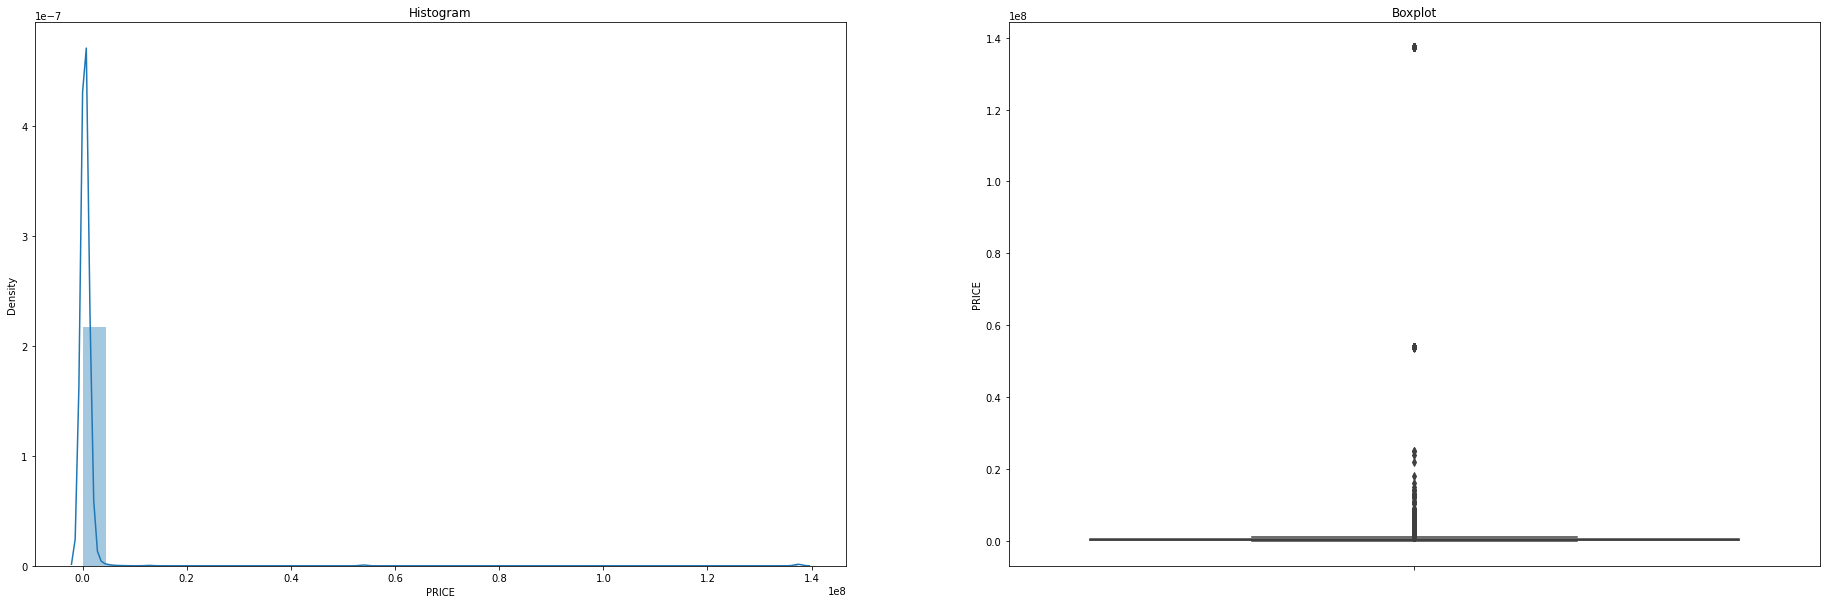

In [ ]:
diagnostic_plots(df,'PRICE')